In [1]:
# Import essential libraries
import pandas as pd 
import seaborn as sb 
import numpy as np 
import matplotlib.pyplot as plt 
sb.set()

# Linear regression libraries 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('cleaned-df3.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,2,2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,107.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,7,7,6.5,R,Benjamin Caron,1781.0,371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116.0,"Motivations are suspect, and expectations are ...",Sharper,18225.0,"Brian Gatewood, Alessandro Tanaka"
4,8,8,6.9,PG-13,Ravi Kapoor,458.0,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80.0,An\r\n unmotivated South Asian American rapper...,Four Samosas,6912.0,Ravi Kapoor


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8429 entries, 0 to 8428
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     8429 non-null   int64  
 1   Unnamed: 0       8429 non-null   int64  
 2   IMDb-rating      8429 non-null   float64
 3   appropriate_for  8429 non-null   object 
 4   director         8429 non-null   object 
 5   downloads        8429 non-null   float64
 6   id               8429 non-null   int64  
 7   industry         8429 non-null   object 
 8   language         8429 non-null   object 
 9   posted_date      8429 non-null   object 
 10  release_date     8429 non-null   object 
 11  run_time         8429 non-null   float64
 12  storyline        8429 non-null   object 
 13  title            8429 non-null   object 
 14  views            8429 non-null   float64
 15  writer           8429 non-null   object 
dtypes: float64(4), int64(3), object(9)
memory usage: 1.0+ MB


### Uni-Variate Linear Regression 

Response Variable : **rating** 

Predictor Feature : **downloads**

> Regression Model : rating = $a$ $\times$ downloads + $b$  

In [4]:
# Create new dataframes 
rating = pd.DataFrame(df['IMDb-rating']) # response variable
download = pd.DataFrame(df['downloads']) # predictor feature 

# looking through downloads df 
download.head()

,downloads
0,304.0
1,73.0
2,1427.0
3,1781.0
4,458.0


In [5]:
# Looking through rating df 
rating = pd.DataFrame(df['IMDb-rating'])

rating.head()

,IMDb-rating
0,4.8
1,6.4
2,5.2
3,6.5
4,6.9


### Splitting the data

Split the dataset uniformly at random.

Train set contains 80% of the data while Test set contains 20%. 

In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(download, rating, test_size = 0.20)

# Create a joint dataframe of the train set 
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Check the sample sizes 
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (6743, 1) (6743, 1)
Test set:  (1686, 1) (1686, 1)


### Basic Exploration 

To understand our data better, we perform basic statistical exploration and data visualisation on the train data.

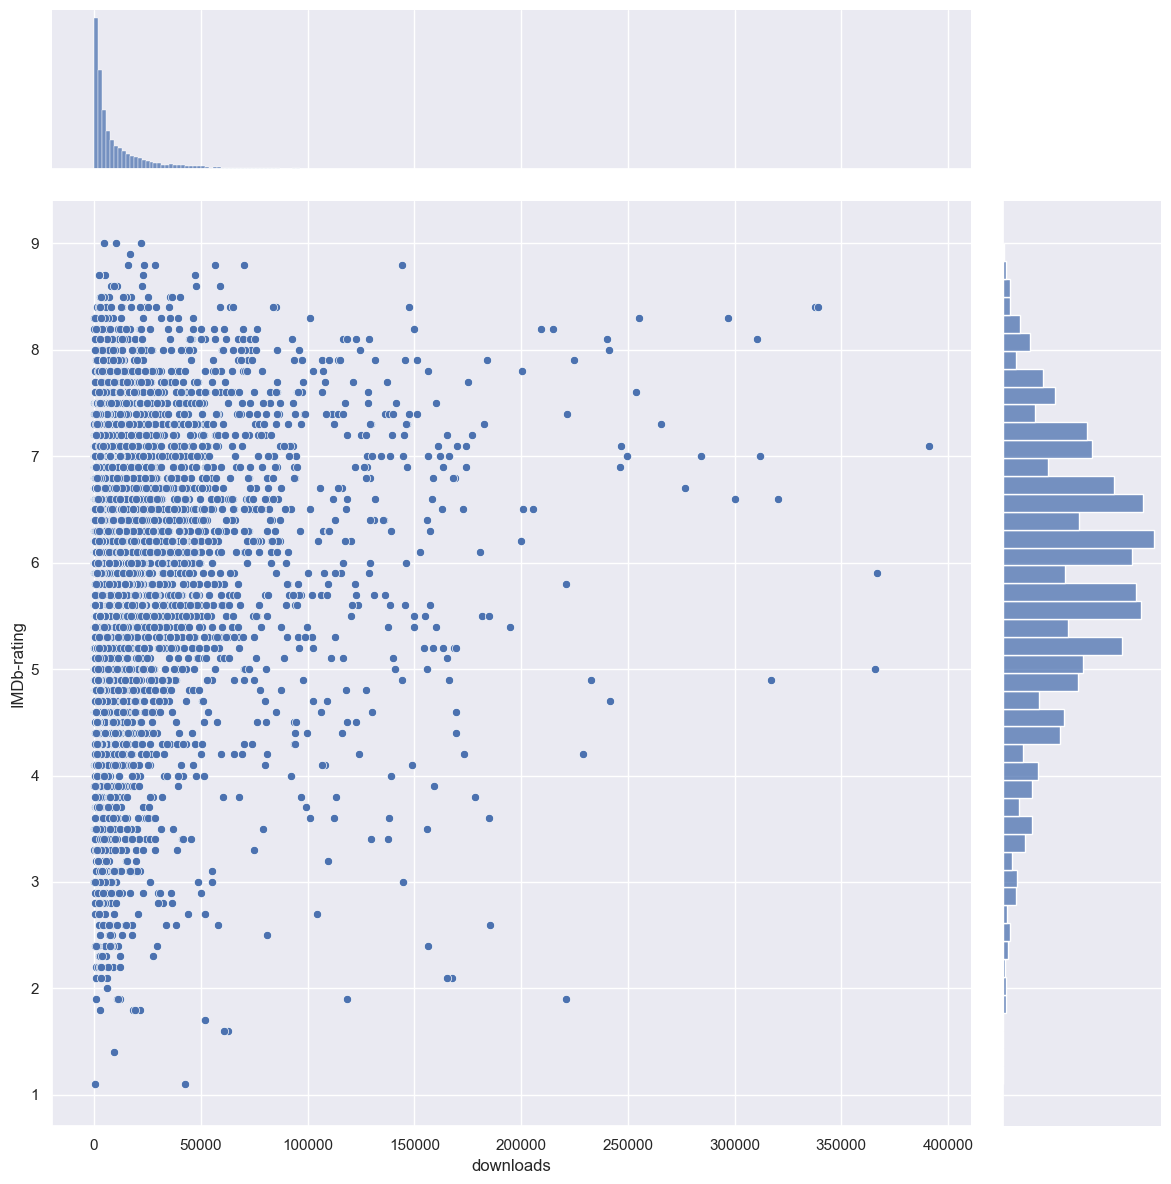

In [7]:
sb.jointplot(data = trainDF, x = "downloads", y = "IMDb-rating", height = 12)

<AxesSubplot:>

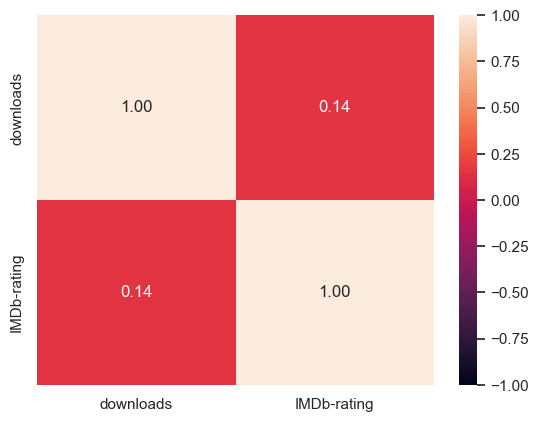

In [8]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

From the heatmap, we deduce a correlation coefficient of 0.10, which indicates a poor relationship between downloads and rating.

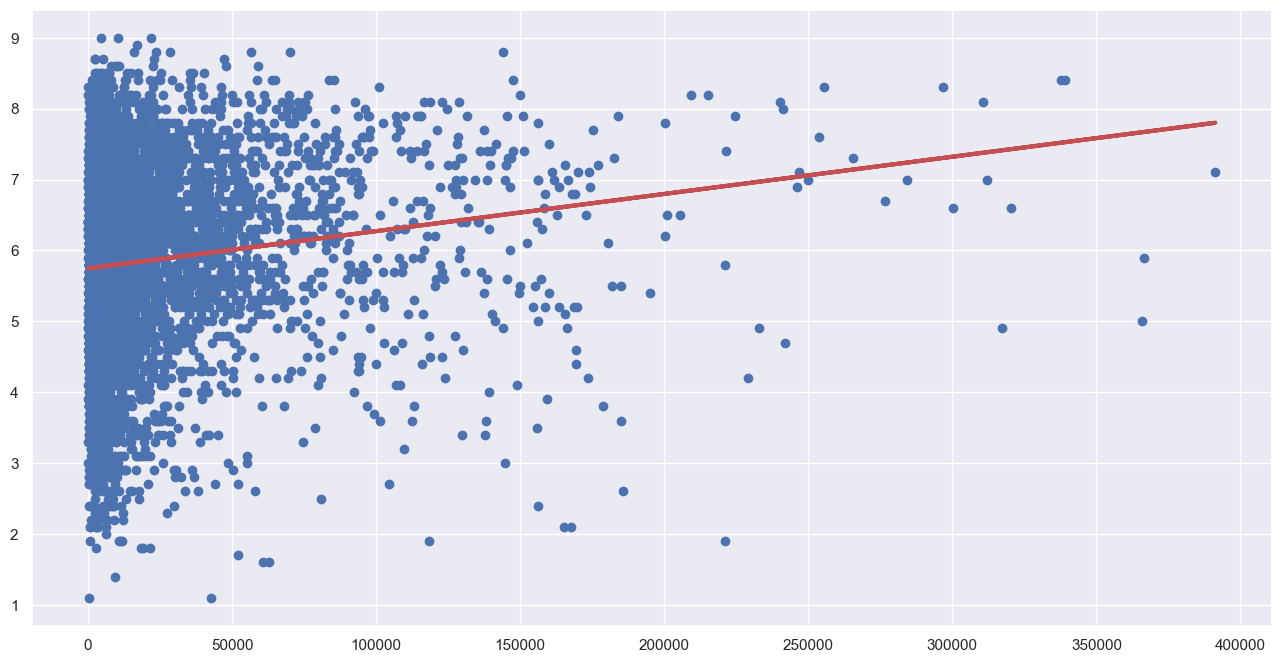

In [14]:
# Create and fit the linear regression model on the training dataset  
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [10]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [5.74742324]
Coefficients 	: a =  [[5.24991913e-06]]


### Prediction of response using the formulated model 
> Regression Model : rating = $a$ $\times$ downloads + $b$ 

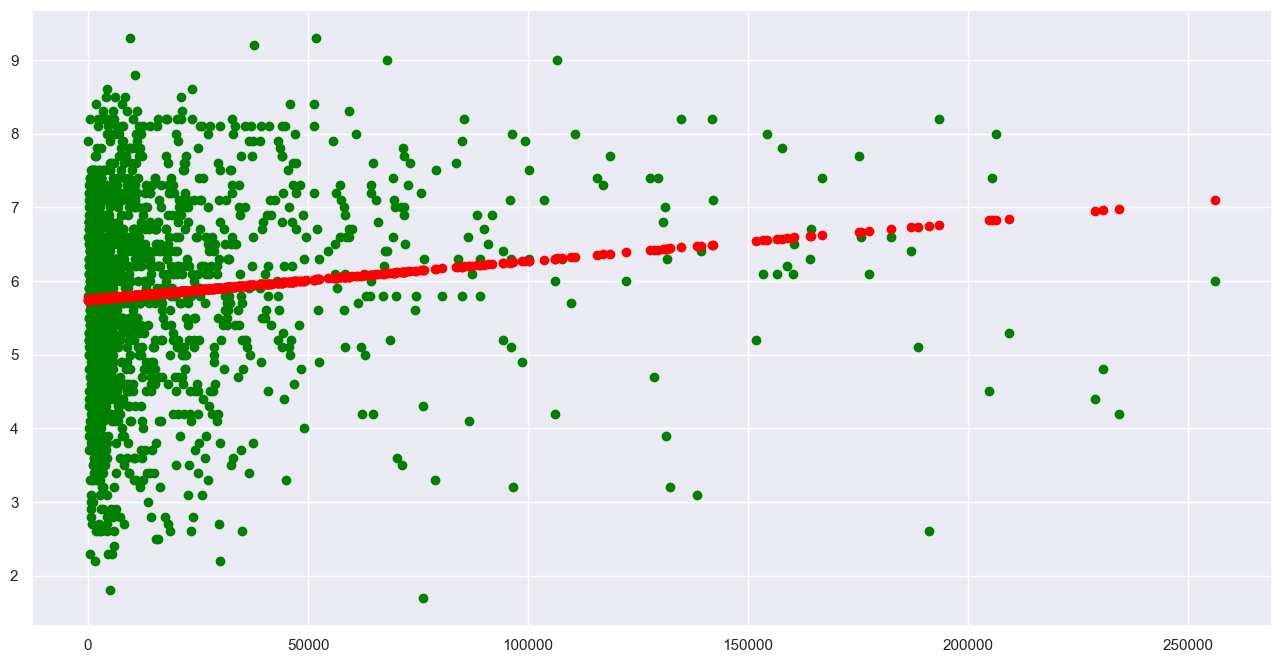

In [11]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green") # green = test cases 
plt.scatter(X_test, y_test_pred, color = "red") # red = predicted values
plt.show()

In [12]:
# Check the goodness of fit (on train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the goodness of fit (on test data)
print("Goodness of Fit of Model \t Test Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.019858681210753293
Mean Squared Error (MSE) 	: 1.470383040384203

Goodness of Fit of Model 	 Test Dataset
Explained Variance (R^2) 	: 0.016736346209600628
Mean Squared Error (MSE) 	: 1.6398655112863447



From the low R^2 value, we can conclude that underfitting has occured. The model, containing only one variable, is too simple, hence we have to add other variables so as to improve the model. 

### Multi-Variate Linear Regression 
Response Variable : **rating** 

Predictor Feature : **downloads, run time, views**

> Regression Model : rating = $a_1$ $\times$ downloads + $a_2$ $\times$ run time + $a_3$ $\times$ views + $b$ 

Intercept of Regression 	: b =  [3.85626338]
Coefficients of Regression 	: a =  [[-2.14226297e-06  1.80896665e-02  1.09142166e-06]]

  Predictors  Coefficients
0  downloads     -0.000002
1   run_time      0.018090
2      views      0.000001



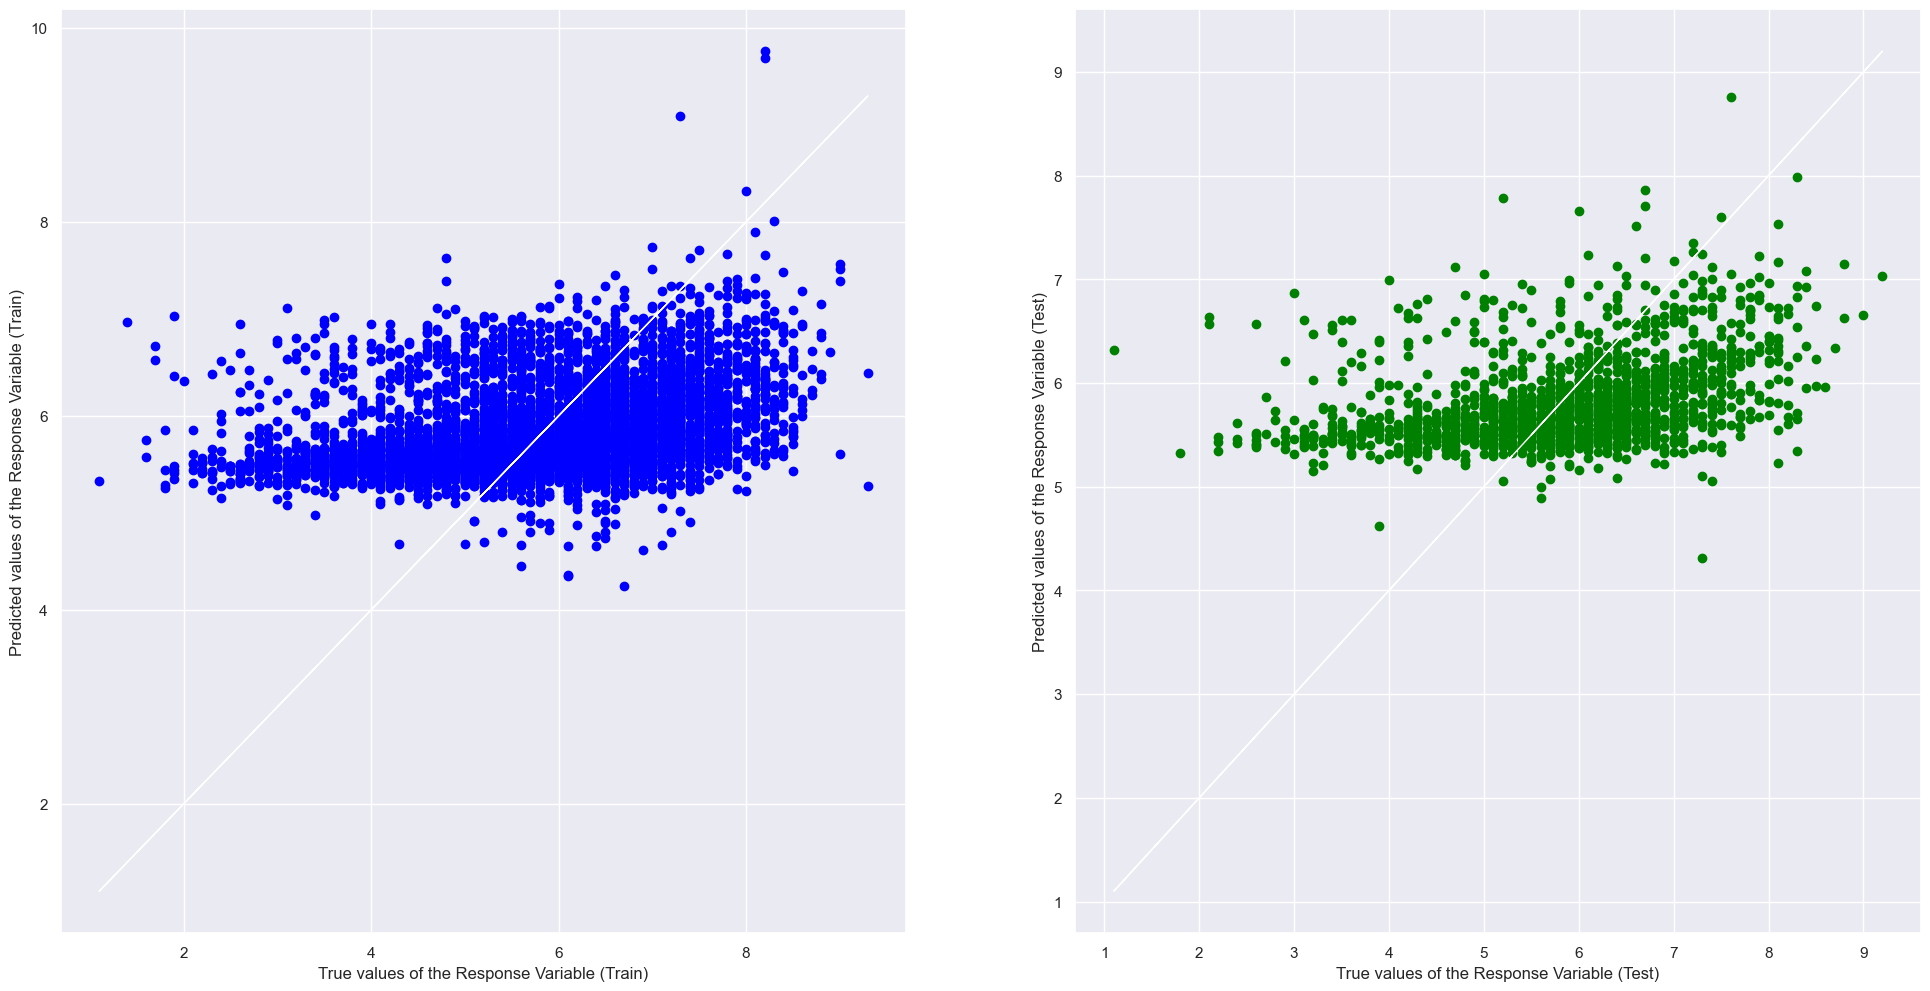

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.12351242224298331
Mean Squared Error (MSE) 	: 1.3511757100689694

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1353582174307214
Mean Squared Error (MSE) 	: 1.2984575582642859



In [16]:
# Extract Response and Predictors
y = pd.DataFrame(df['IMDb-rating'])
X = pd.DataFrame(df[['downloads', 'run_time', 'views']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

The R^2 value of the new model is higher the R^2 value of the old model. This can be attributed to the new predictor variables that are introduced in the new model.